<a href="https://colab.research.google.com/github/GabrielVillagran/NonLinearDataCodes/blob/linear/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework: linear, polynomial and splines regression on nonlinear data
Villagran Saucedo Gabriel Aldair 

Undergraduate, 2017 generation, 267572, 201702370947

Dr. Cuevas Tello Juan Carlos

Aprendizaje Automatico (Machine Learning) 

14/02/2022                                     

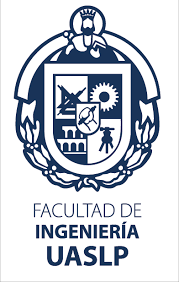

# Abstract
In this homework we are going to compare the different regressions using the nonlinear data, the regressions that were calculated was

- Polynomial
- Splines
- Linear

The code was developed in python using a jupyter notebook, the regressions are calculated for the first 100 levels, plotting the best one which was calculated based on the MSE.
# Introduction

The first regression that we are going to calculate is the linear regression for the first 100 levels of data. Remember that linear regression is a linear approach for modeling the relationship between a scalar response and one or more explanatory variables
# Linear Regression

Mounted at /content/drive/
DS-5-1-G-0-N-0_error_bars_0-106.eps    DS-5-1-GAP-1-1-N-1_v2.dat
DS-5-1-G-5-1-N-0_error_bars_0-466.eps  DS-5-1-GAP-5-1-N-3_v2.csv
DS-5-1-GAP-0-1-N-0_v2.csv	       DS-5-1-GAP-5-1-N-3_v2.dat
DS-5-1-GAP-0-1-N-0_v2.dat	       underlying_DS-5-1.jpg
DS-5-1-GAP-1-1-N-1_v2.csv


Text(0.5, 1.0, 'dataset: /content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/')

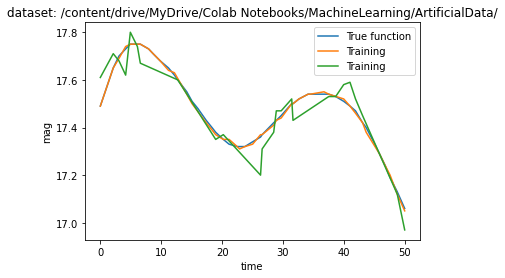

In [ ]:
#Loading data from Drive
from google.colab import  drive
drive.mount('/content/drive/')
!ls "/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData"

import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/'
FILE1_csv = 'DS-5-1-GAP-0-1-N-0_v2.csv'
FILE2_csv = 'DS-5-1-GAP-1-1-N-1_v2.csv'
FILE3_csv= 'DS-5-1-GAP-5-1-N-3_v2.csv'
#Saving the FILE1 into d variable
d1 = pd.read_csv(DATA_PATH + FILE1_csv, header=None)
d2 = pd.read_csv(DATA_PATH + FILE2_csv, header=None)
d3 = pd.read_csv(DATA_PATH + FILE3_csv, header=None)
#plotting the datasets
plt.plot(d1[0], d1[1], label="True function")
plt.plot(d2[0], d2[1], label="Training")
plt.plot(d3[0], d3[1], label="Training")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("dataset: "+ DATA_PATH)

In [ ]:
# Importing the libraries that are necessaries
#Metrics
from sklearn.metrics import mean_squared_error
#Polynomial interpolation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np
# Performing polynomial regression on 100 curves, i.e. 100 polynomial models.

#Loading the data
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/'
FILE_TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
FILE_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
FILE_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

#creating an array to  save the MSE
train = [200]
test = [200]
train2 = [200]
test2 = [200]
#Reading True data
d_true = pd.read_csv(DATA_PATH + FILE_TRUE,header=None)
#Reading Noise1 data
d_noise1 = pd.read_csv(DATA_PATH + FILE_NOISE1,header=None)
#Reading Noise2 data
d_noise2 = pd.read_csv(DATA_PATH + FILE_NOISE2,header=None)

#Calculating polynomial regression for each column
for mod in range (1, 101):
  #polynomial degree (this was the best value)
  degree = 2  
  #calculating the polynomial regression
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

  #DATA_PATH_NOISE1 = DS-5-1-GAP-1-1-N-1_v2.csv
  X = d_noise1[0]  #time
  x= X[:100, np.newaxis]
  Y = d_noise1[mod]  
  y = Y[:, np.newaxis]
  #Ground Truth data
  X_test = d_true[0]
  Y_test = d_true[1]

  #Training
  model.fit(x, y)  #get polynomial model for training data

  x_test = X_test[:, np.newaxis]
  y_test = Y_test[:, np.newaxis]

  #Testing
  y_pred_train = model.predict(x) 
  y_pred_test = model.predict(x_test)
  #Calculating the MSE
  MSE_train = mean_squared_error(y,y_pred_train)
  MSE_test = mean_squared_error(y_test,y_pred_test)

  #Saving the values into an array
  train.append(MSE_train)
  test.append(MSE_test)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

In [ ]:
#At this point we have our polynomial regression already calculated, now we are going to print the MSE
print("Lenght of the MSE_test and MSE_train array: ",len(test), len(train))
for i in range (1, 101):
  print(i)
  print("MSE train ", train[i])
  print("MSE test ",test[i])
  print("======================")

Lenght of the MSE_test and MSE_train array:  101 101
1
MSE train  0.014363759250980927
MSE test  0.013840105222423137
2
MSE train  0.013936212226164467
MSE test  0.013807711908170402
3
MSE train  0.013566493840847241
MSE test  0.013794284347695265
4
MSE train  0.014195266536315771
MSE test  0.013802558962282123
5
MSE train  0.014036580524726425
MSE test  0.01386549083130479
6
MSE train  0.0140356849332489
MSE test  0.01382937908502798
7
MSE train  0.013659936239279987
MSE test  0.013809859674720202
8
MSE train  0.014283882393008852
MSE test  0.013825322908971167
9
MSE train  0.014097848442747297
MSE test  0.013809620188717866
10
MSE train  0.013970082911784743
MSE test  0.013821448369222538
11
MSE train  0.013865977405171688
MSE test  0.01380927674281323
12
MSE train  0.01402077016460333
MSE test  0.013826523195795018
13
MSE train  0.013948315013367367
MSE test  0.01380746122337893
14
MSE train  0.013879418081797424
MSE test  0.01379555083517817
15
MSE train  0.013971277796589932
MSE t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


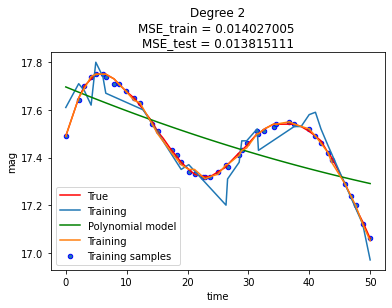

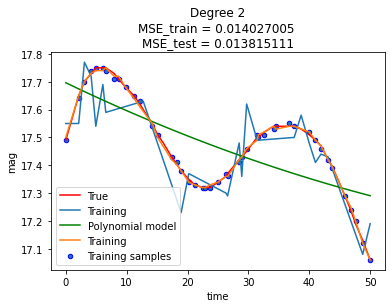

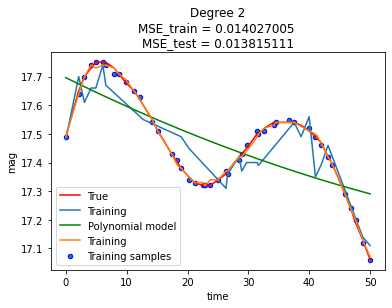

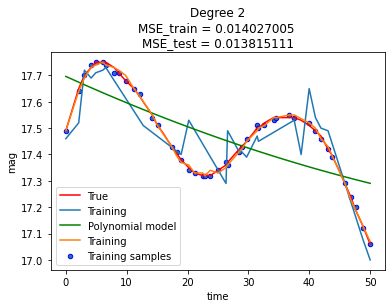

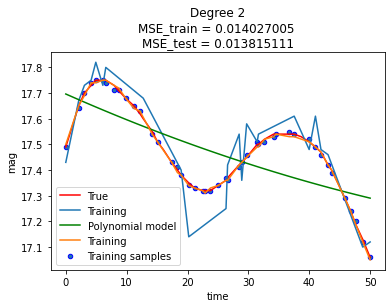

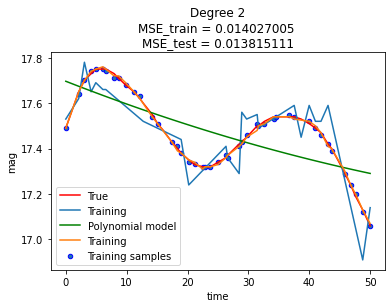

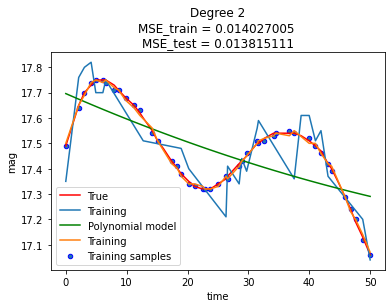

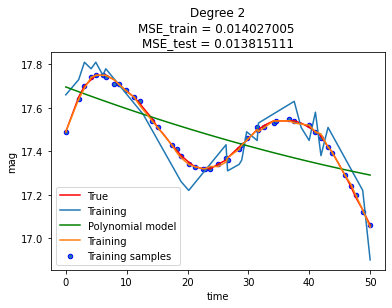

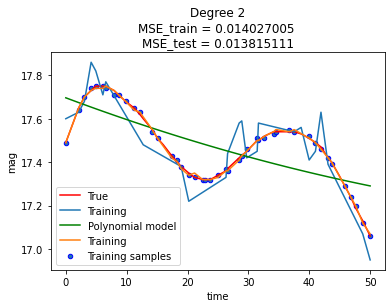

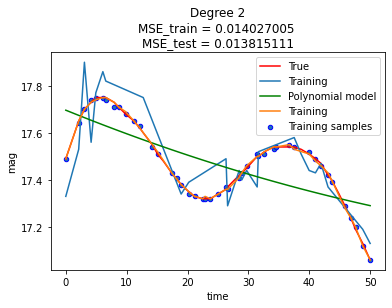

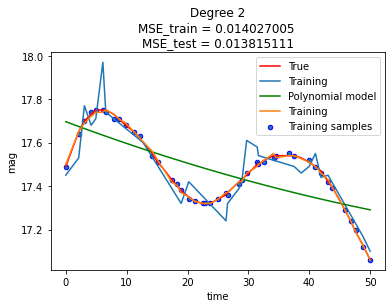

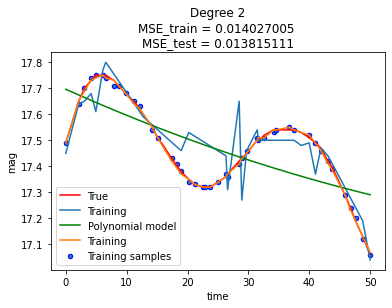

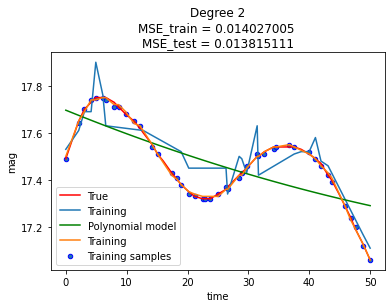

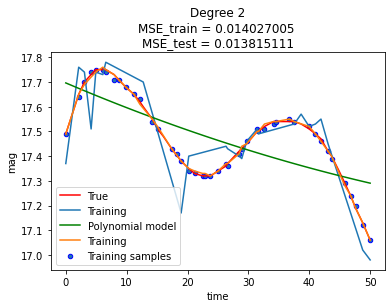

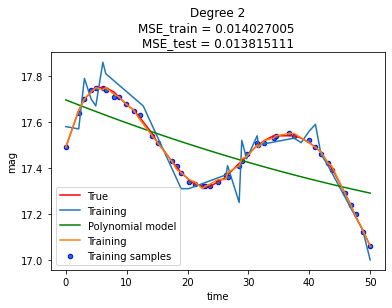

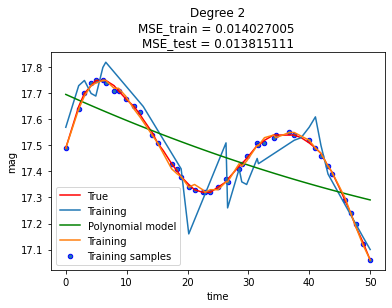

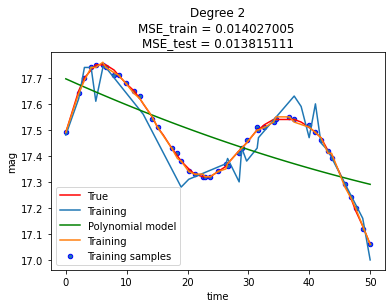

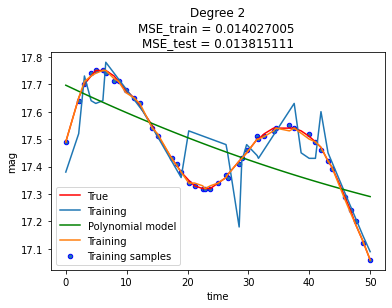

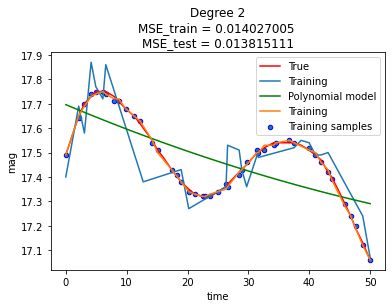

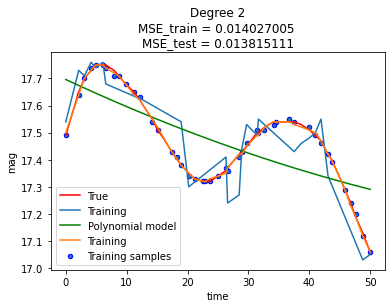

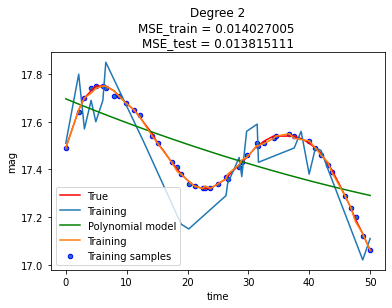

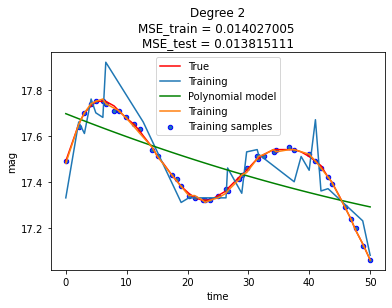

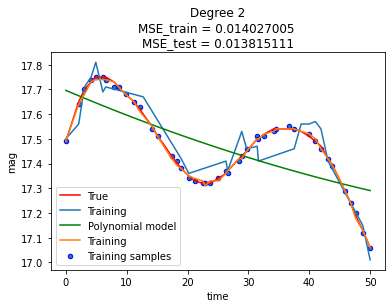

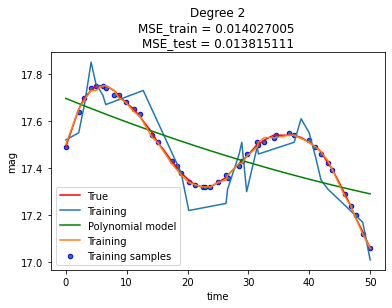

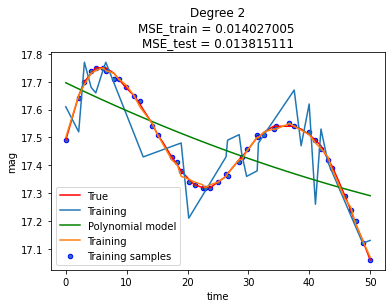

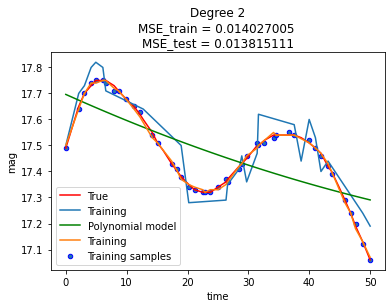

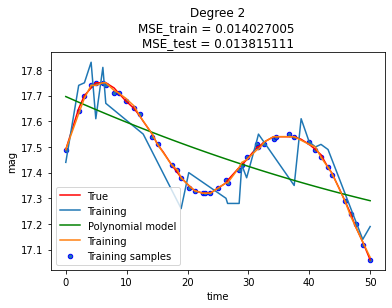

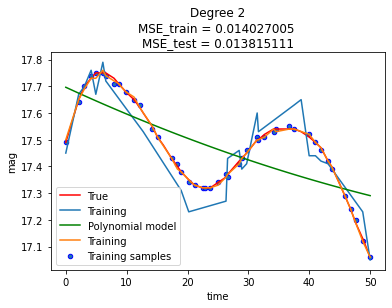

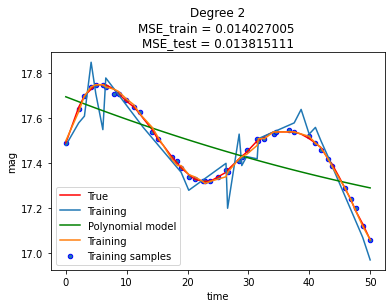

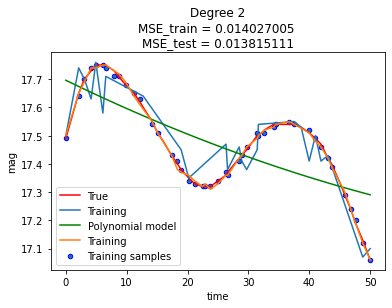

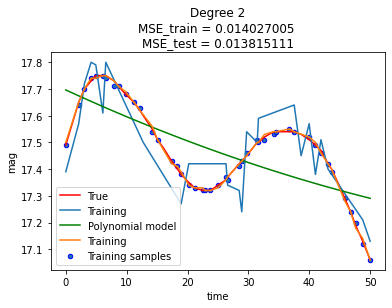

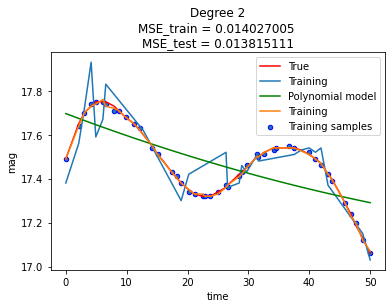

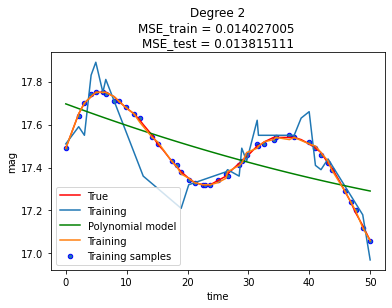

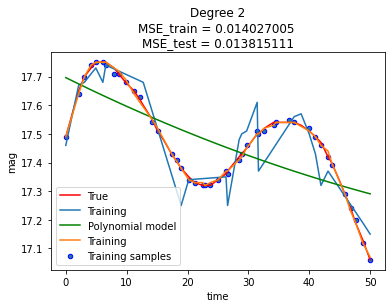

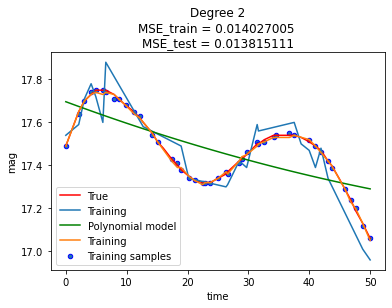

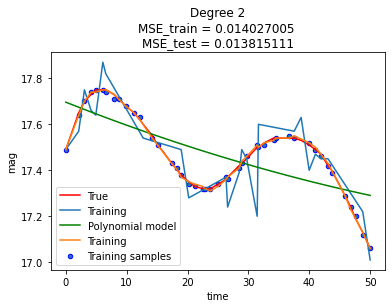

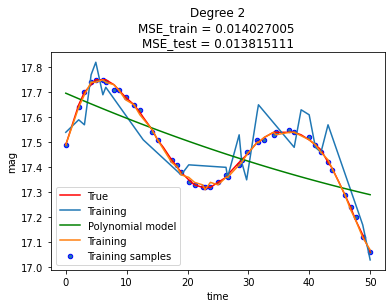

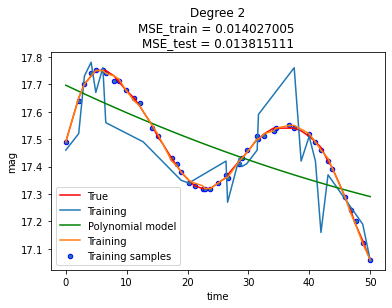

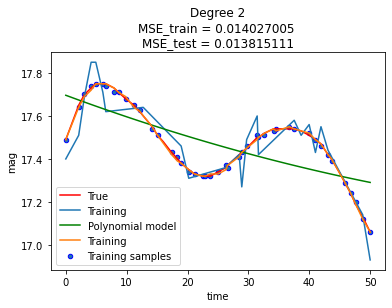

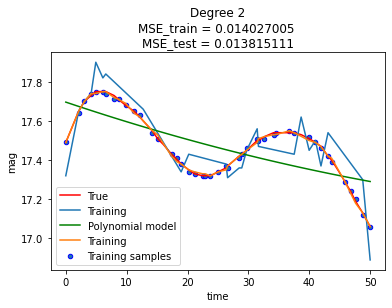

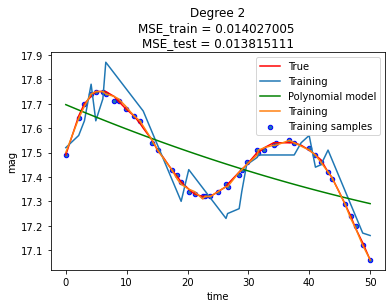

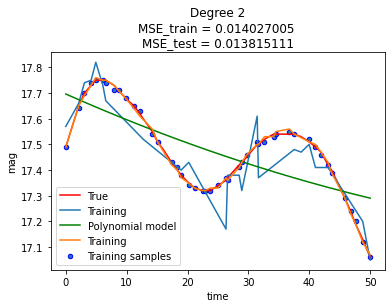

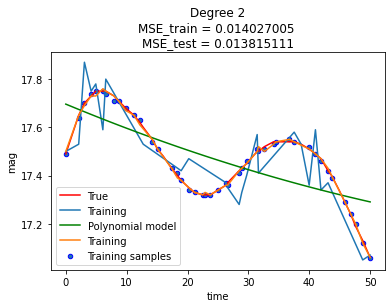

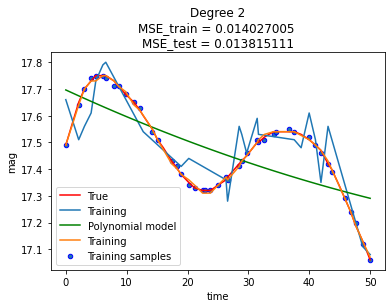

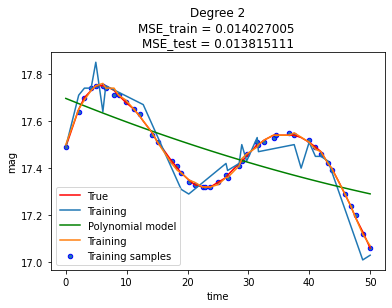

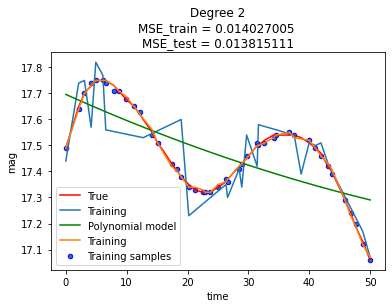

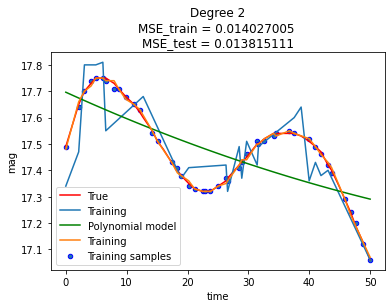

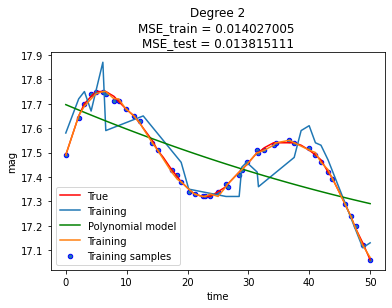

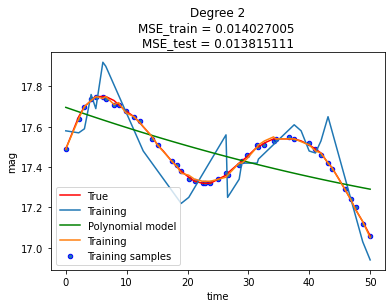

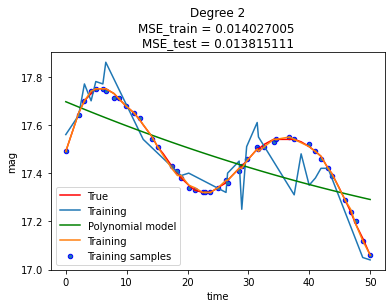

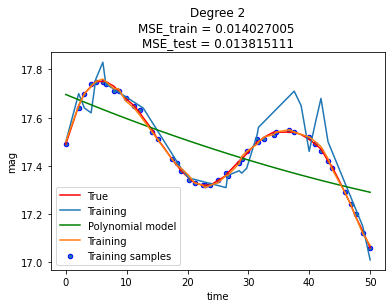

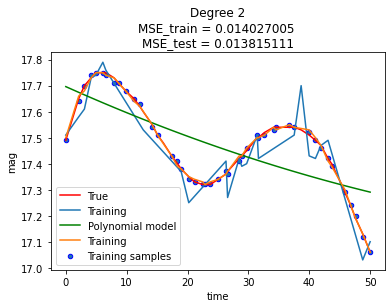

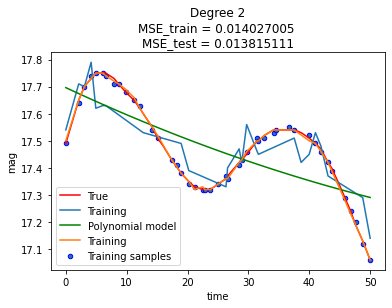

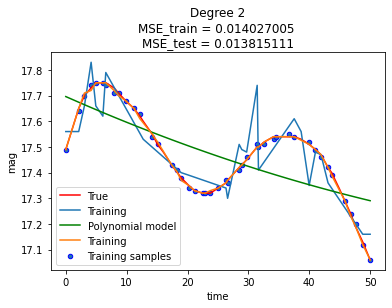

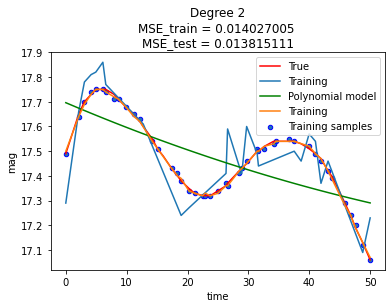

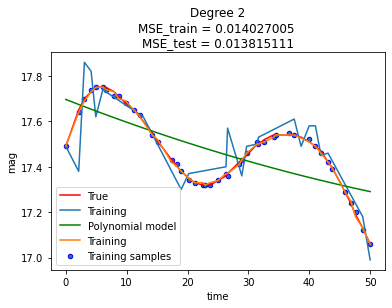

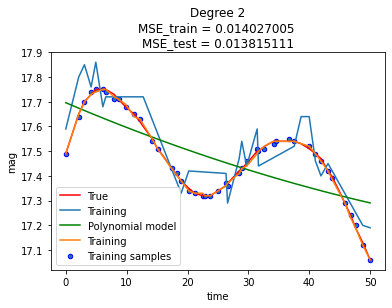

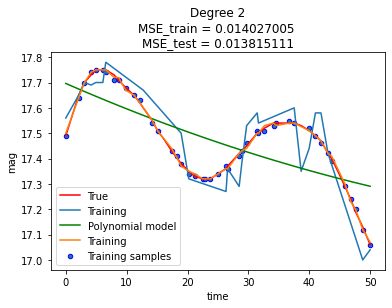

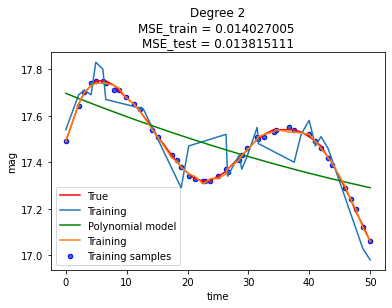

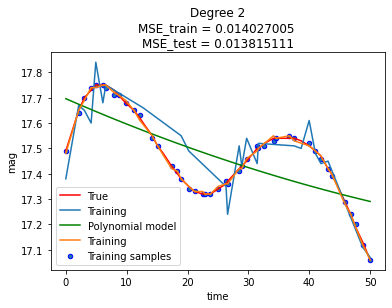

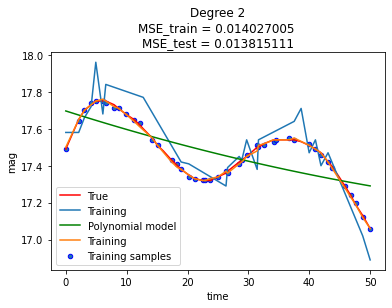

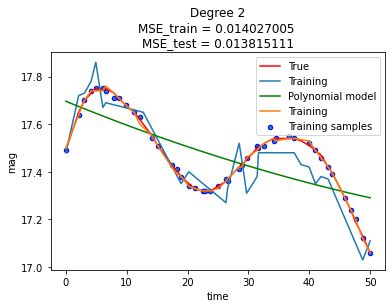

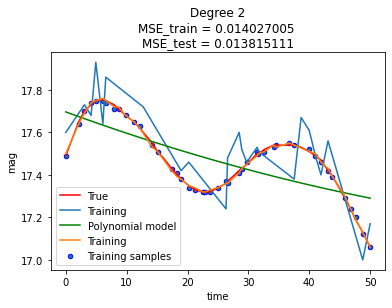

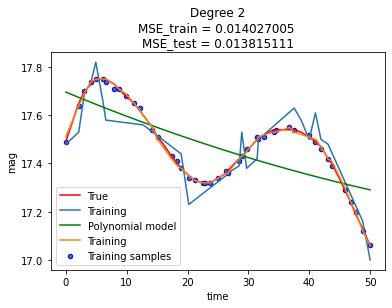

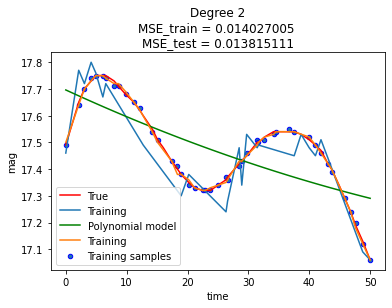

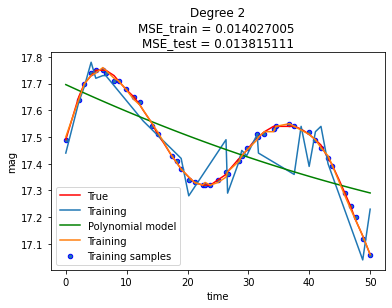

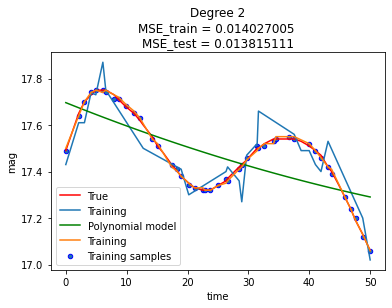

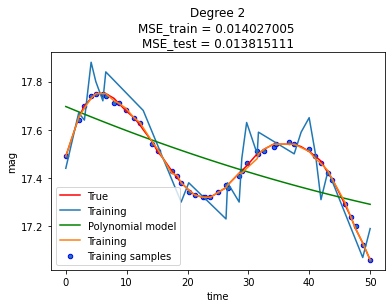

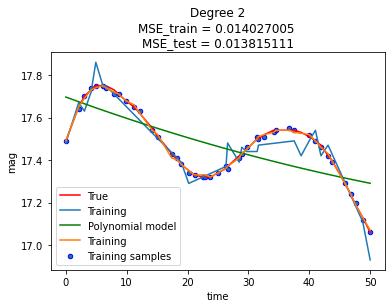

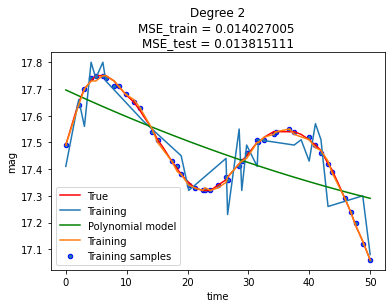

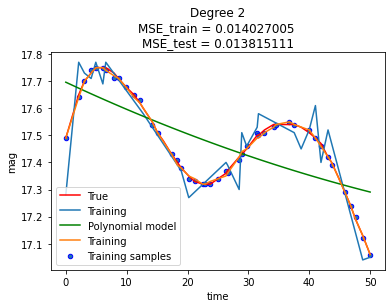

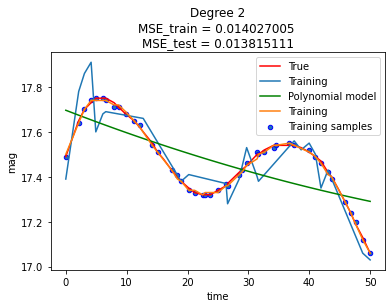

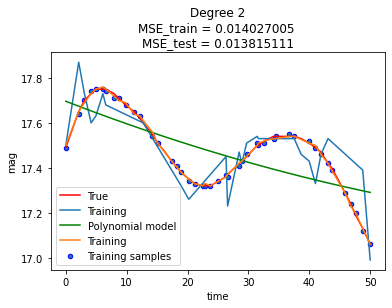

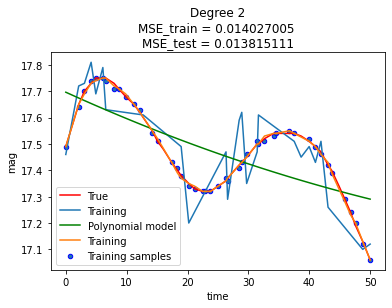

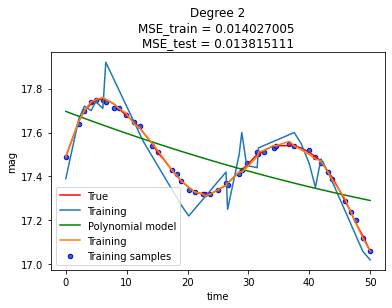

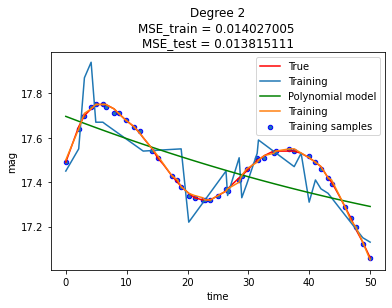

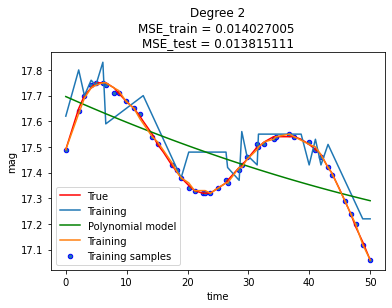

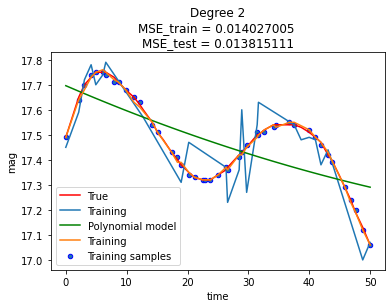

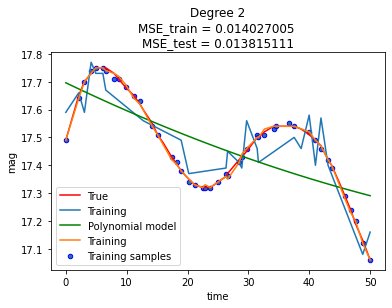

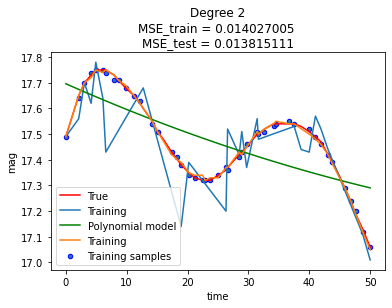

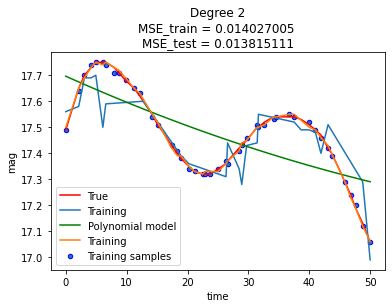

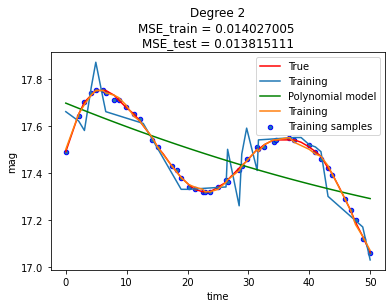

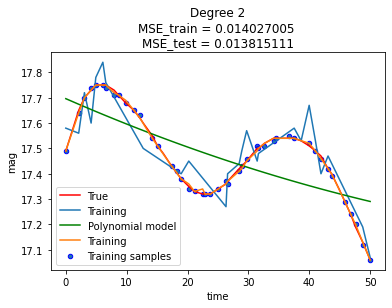

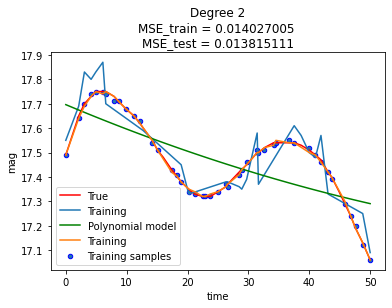

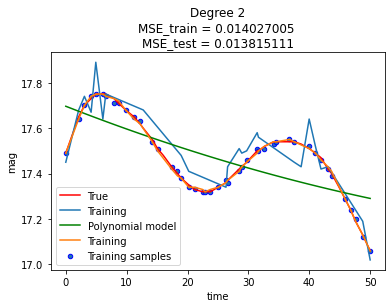

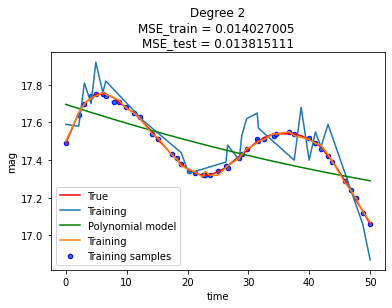

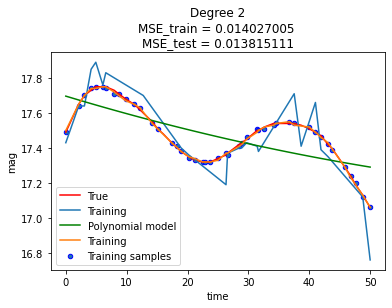

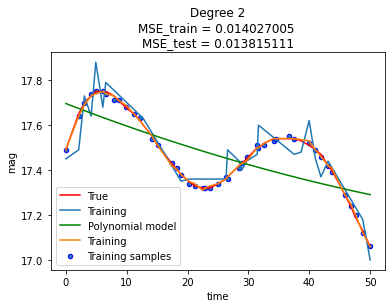

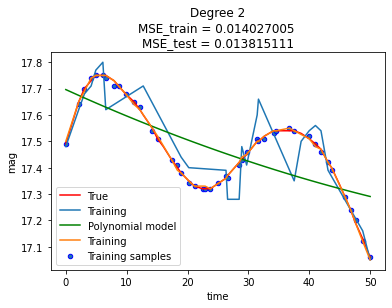

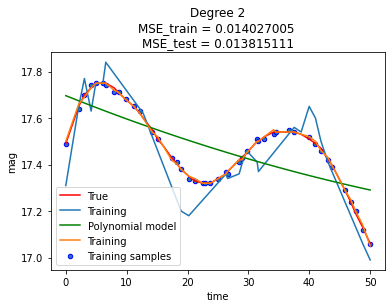

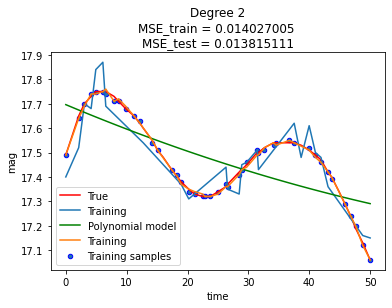

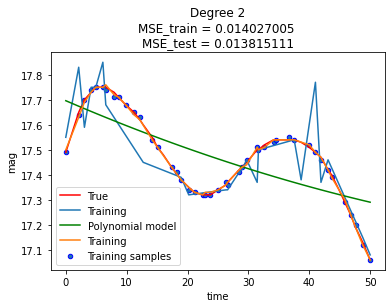

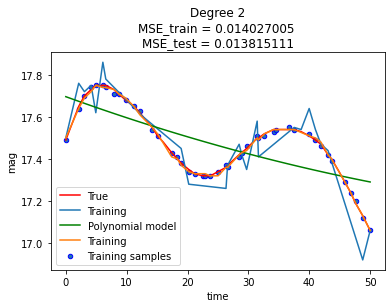

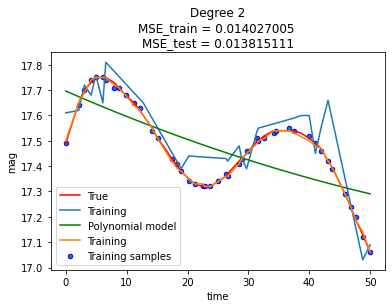

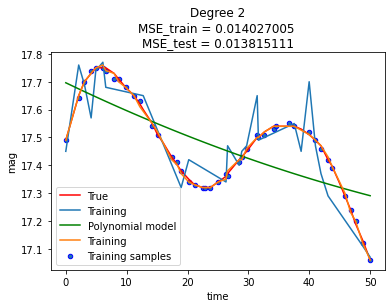

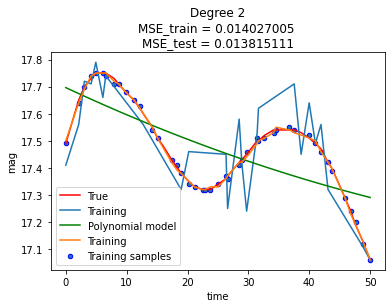

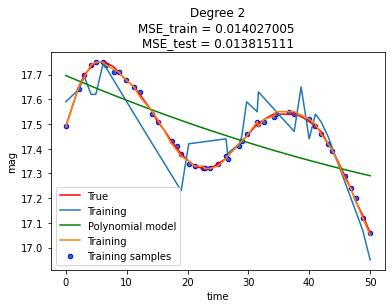

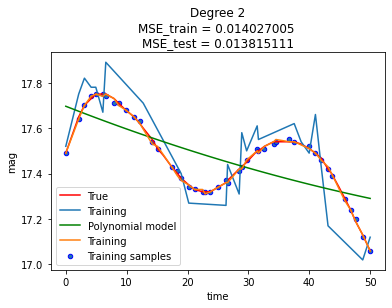

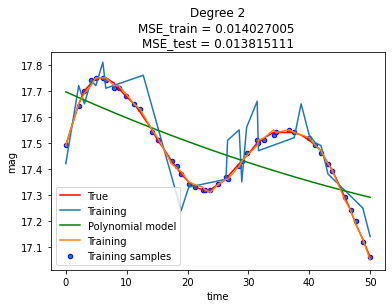

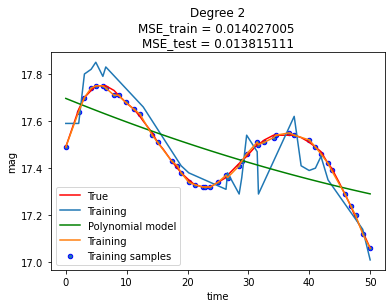

In [ ]:
import matplotlib.pyplot as plt
x_test = X_test[:100, np.newaxis]
y_test = Y_test[:100, np.newaxis]
y_pred_test = model.predict(x_test)
for i in range(1, 101):
  plt.plot(x_test,y_test, color='r', label="True")
  plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
  plt.plot(d3[0], d3[i], label="Training")

  plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
  plt.plot(d2[0], d2[i], label="Training")
  plt.xlabel("time")
  plt.ylabel("mag")
  plt.legend(loc="best")
  plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
          degree, MSE_train, MSE_test))
  plt.show()

In [ ]:
#Performing polynomial regression for the noise data 2 (DS-5-1-GAP-5-1-N-3_v2.csv)
#Calculating polynomial regression for each column
for mod in range (1, 101):
  # DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'
  X = d_noise2[0]  #time
  x = X[:, np.newaxis]
  Y = d_noise2[mod]  #mag_A
  y = Y[:, np.newaxis]

  #Training
  model.fit(x, y)  #get polynomial model for training data

  #Testing
  y_pred_train = model.predict(x) 
  y_pred_test = model.predict(x_test)


  MSE_train = mean_squared_error(y,y_pred_train)
  MSE_test = mean_squared_error(y_test,y_pred_test)

  #Saving the values into an array
  train2.append(MSE_train)
  test2.append(MSE_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr

In [ ]:
#We are going to print the MSE
print("Lenght of the MSE_test and MSE_train array: ",len(test2), len(train2))
for i in range (1, 101):
  print(i)
  print("MSE train ", train2[i])
  print("MSE test ",test2[i])
  print("======================")

Lenght of the MSE_test and MSE_train array:  101 101
1
MSE train  0.021357628553007338
MSE test  0.013836643990972652
2
MSE train  0.016577459723120455
MSE test  0.014208711826538767
3
MSE train  0.010199654325367307
MSE test  0.014081321310193013
4
MSE train  0.017956645389433732
MSE test  0.014934064192732703
5
MSE train  0.02644364106002472
MSE test  0.014852551704844001
6
MSE train  0.023239243001912137
MSE test  0.01467980284632883
7
MSE train  0.02353509937649166
MSE test  0.014198388373704551
8
MSE train  0.024949809595227846
MSE test  0.014503442742296382
9
MSE train  0.024093746096511402
MSE test  0.015564038205336205
10
MSE train  0.022163254488263805
MSE test  0.014435707949463758
11
MSE train  0.021921624100695744
MSE test  0.01434562127588852
12
MSE train  0.013115346611173478
MSE test  0.015694961282477653
13
MSE train  0.0128517387165676
MSE test  0.016297638313048278
14
MSE train  0.02648455453128031
MSE test  0.015239801624959897
15
MSE train  0.02209381918900104
MSE t

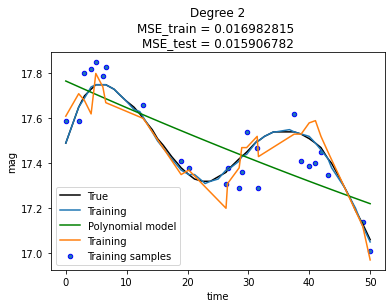

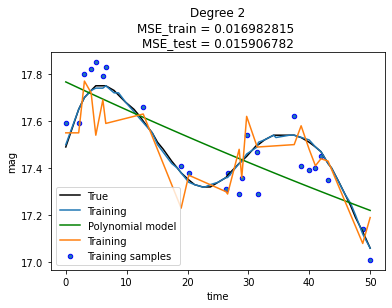

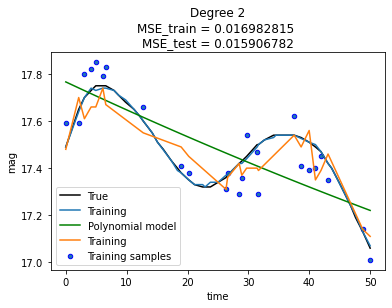

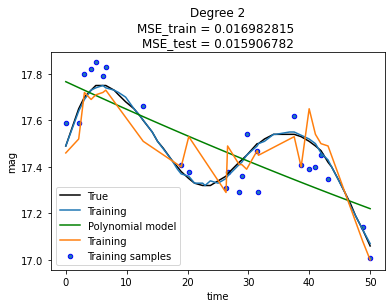

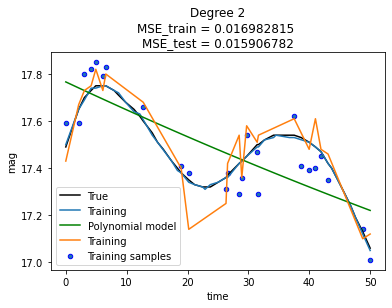

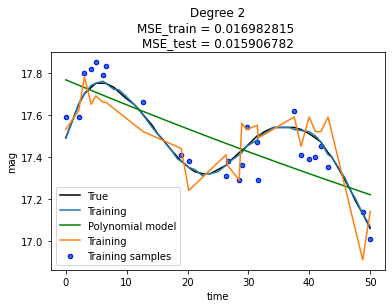

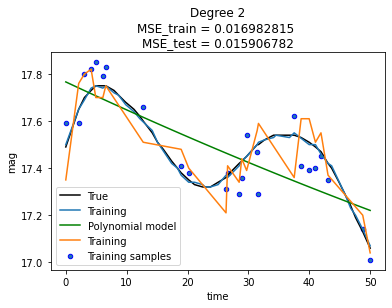

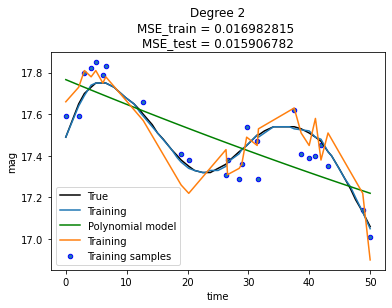

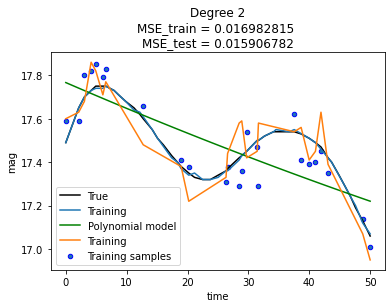

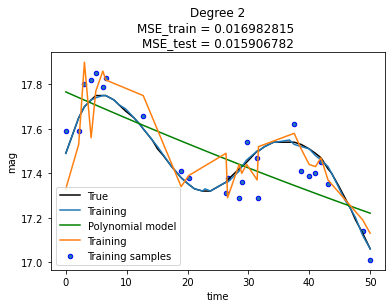

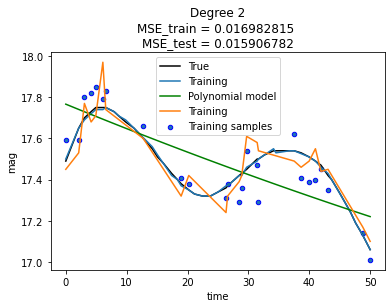

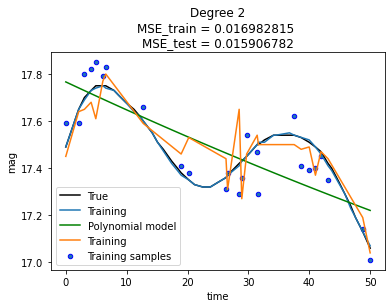

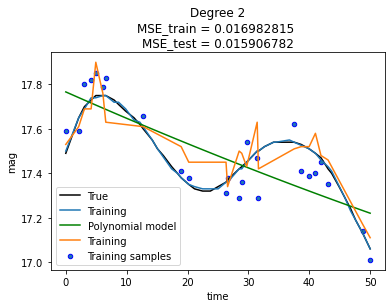

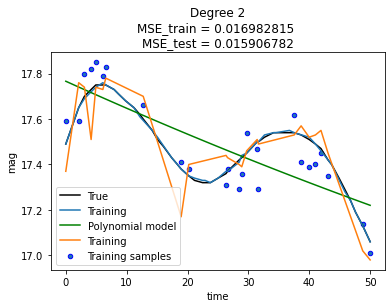

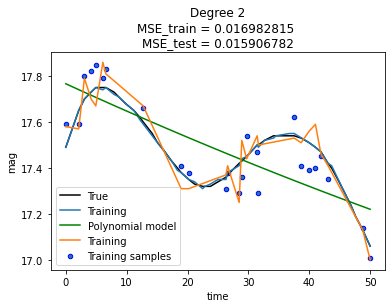

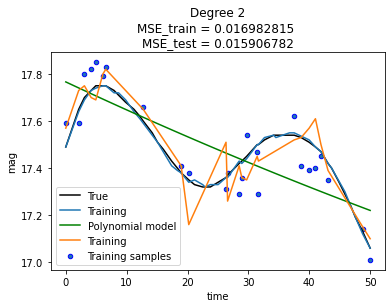

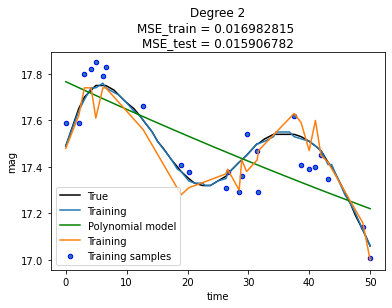

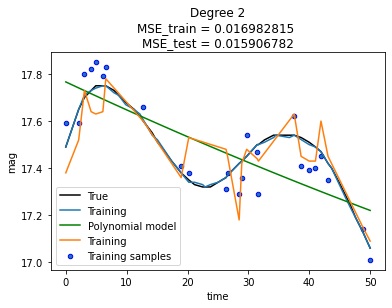

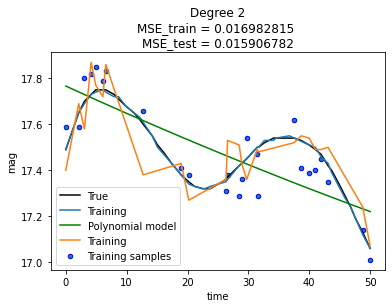

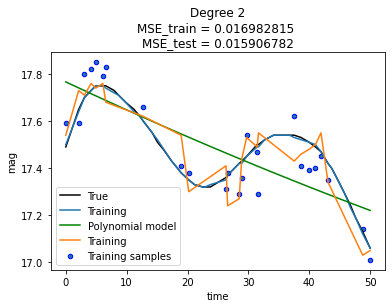

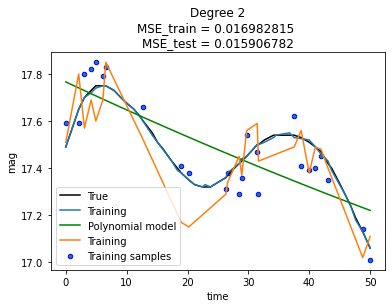

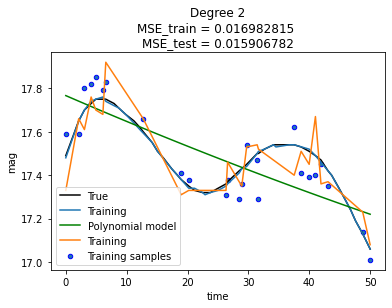

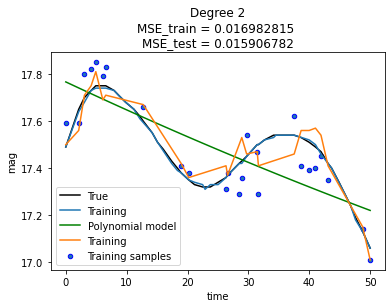

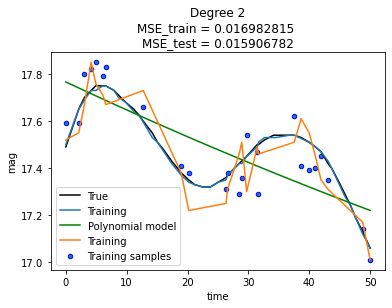

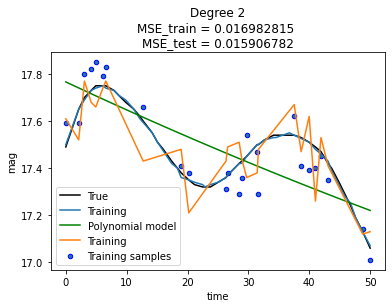

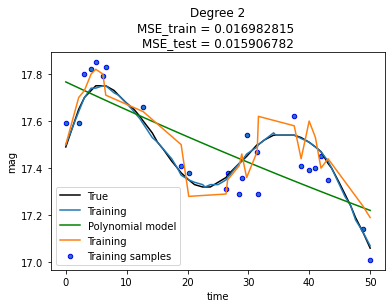

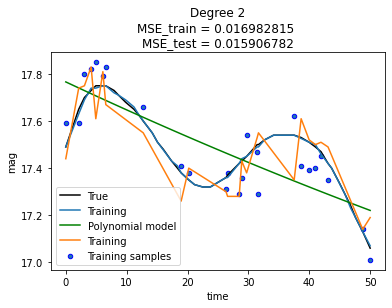

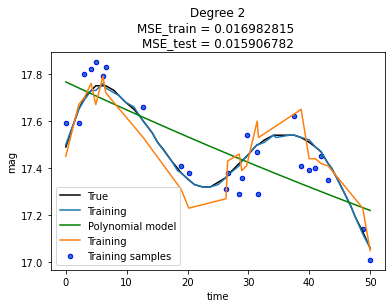

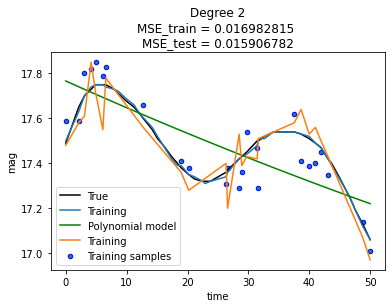

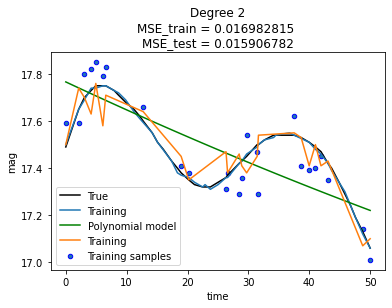

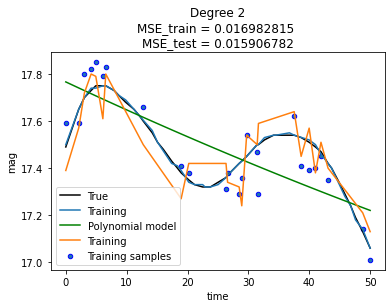

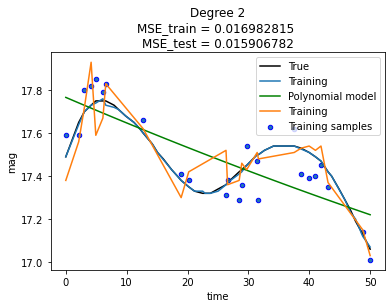

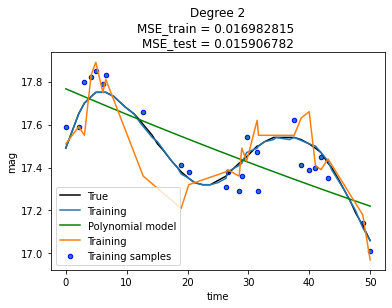

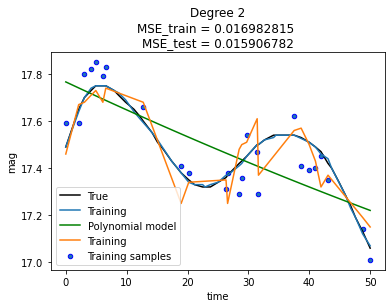

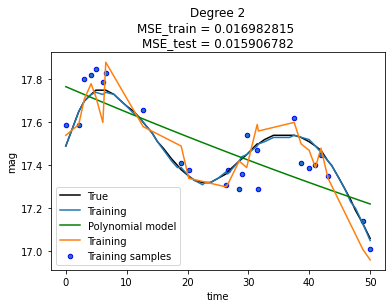

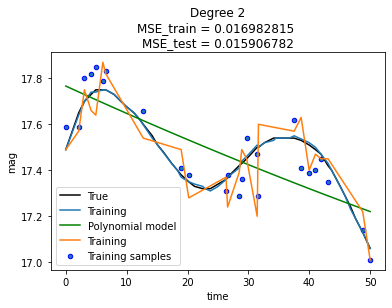

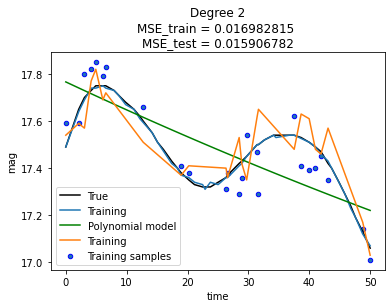

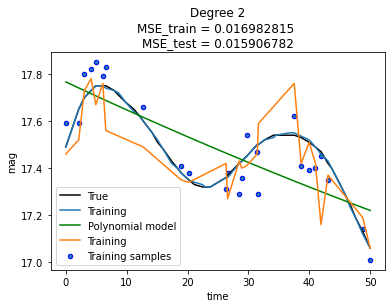

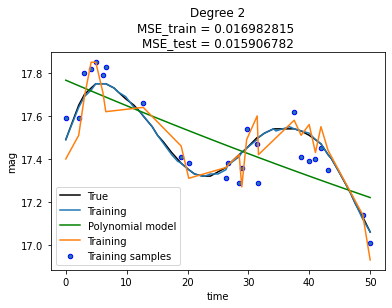

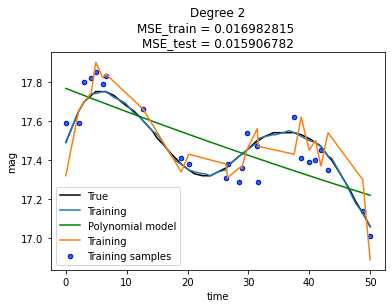

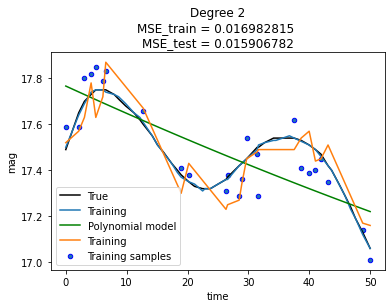

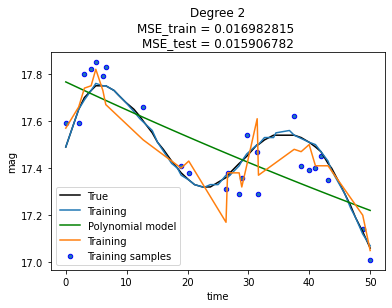

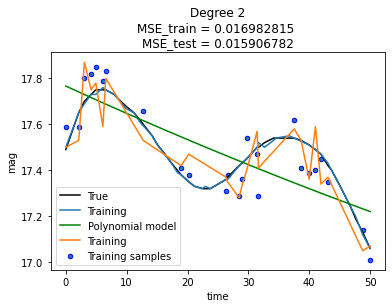

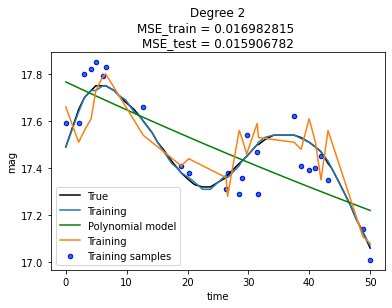

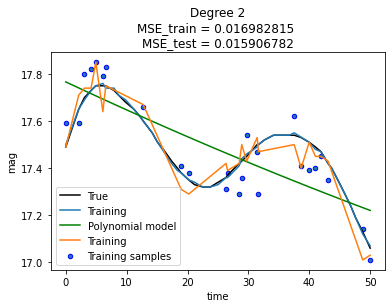

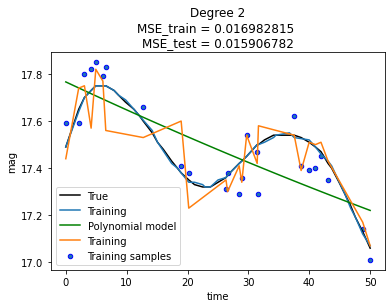

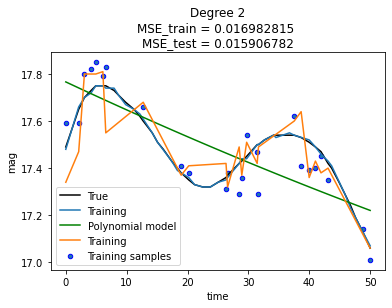

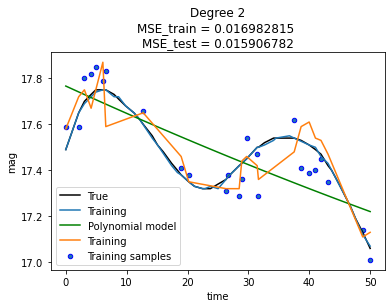

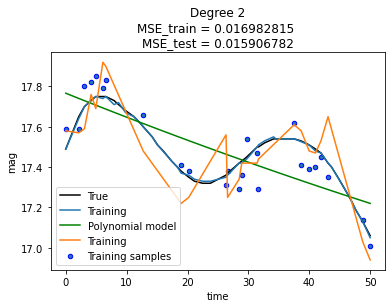

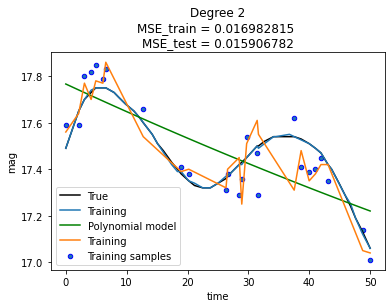

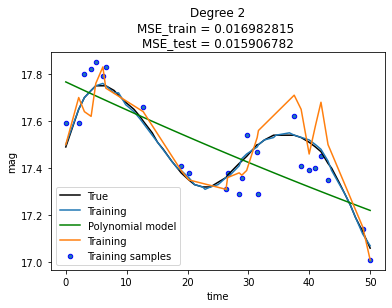

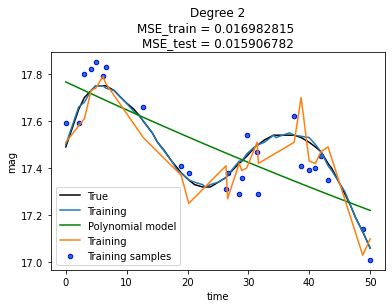

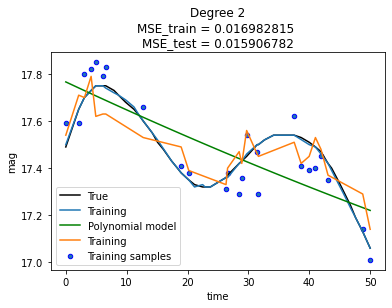

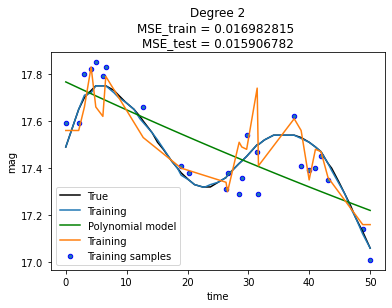

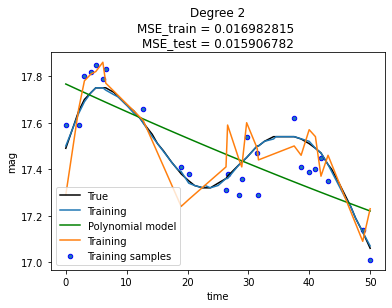

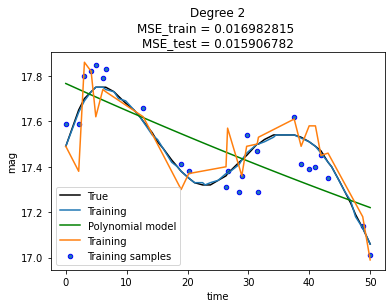

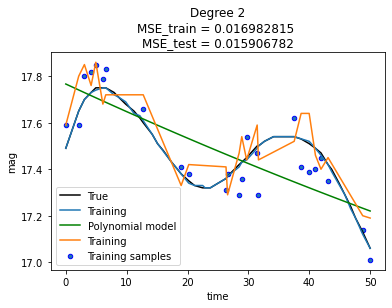

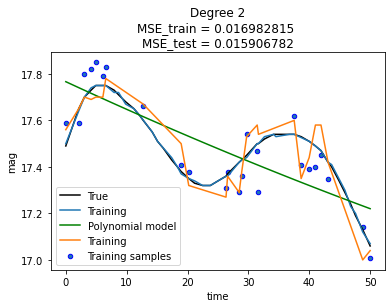

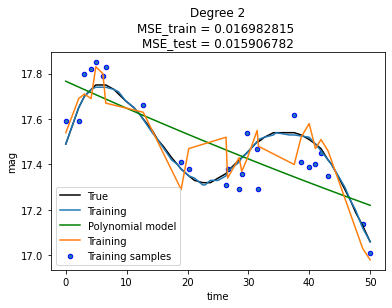

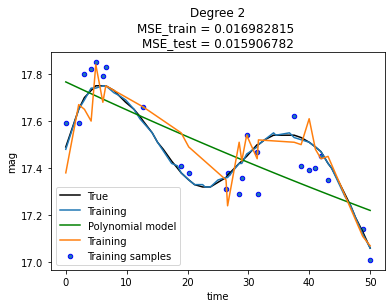

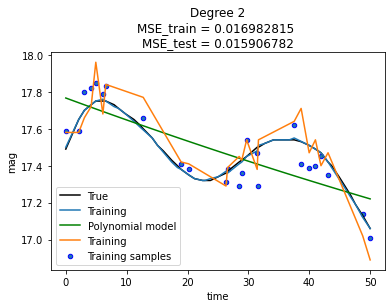

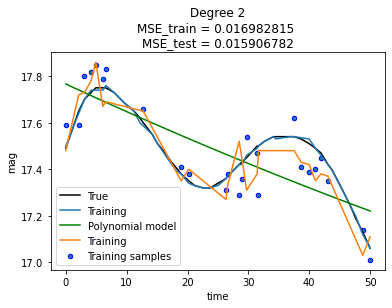

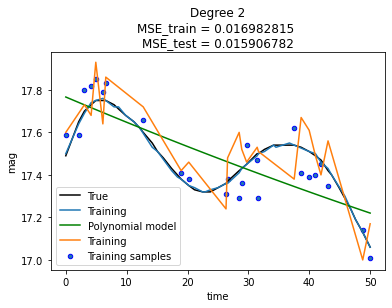

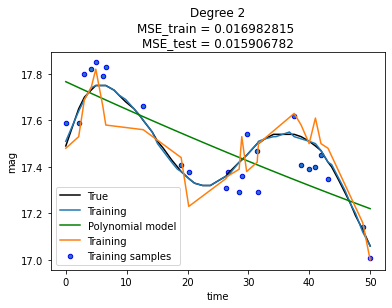

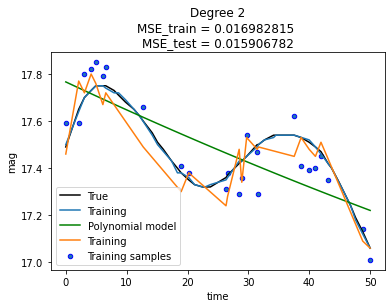

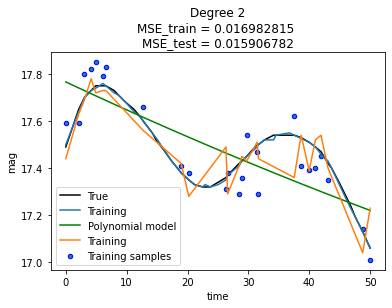

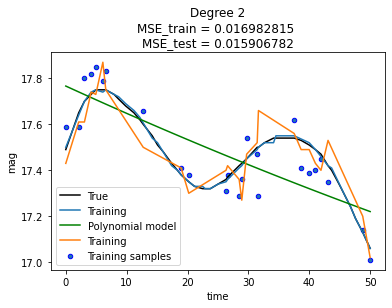

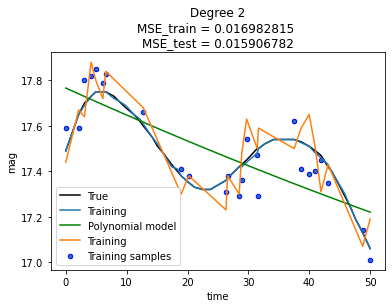

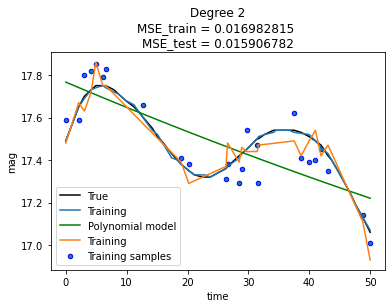

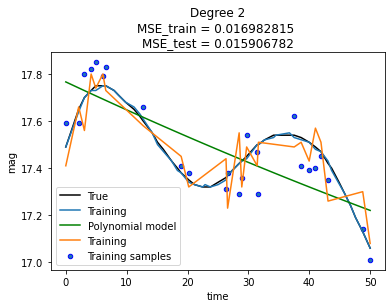

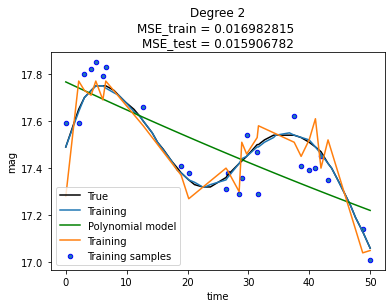

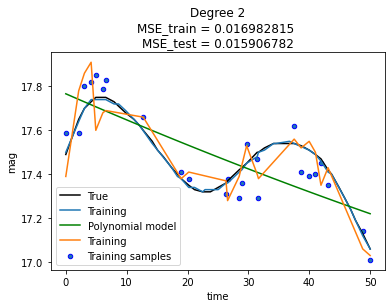

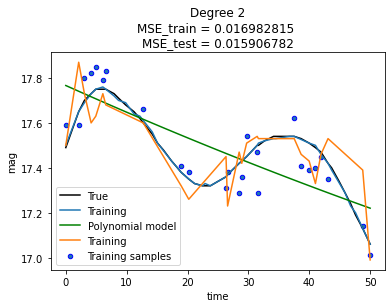

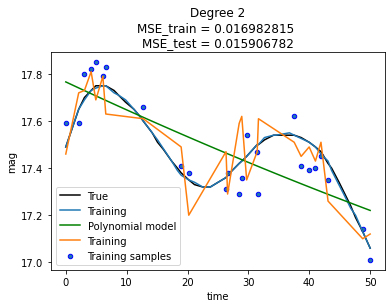

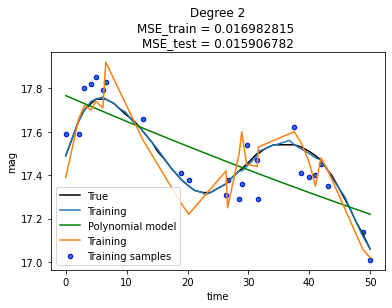

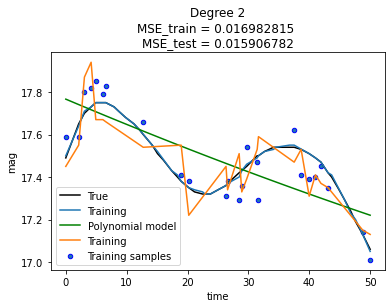

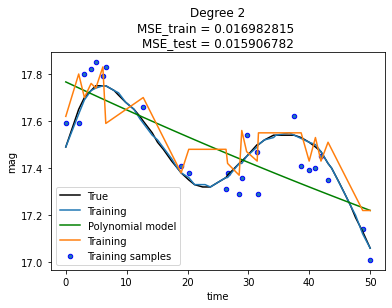

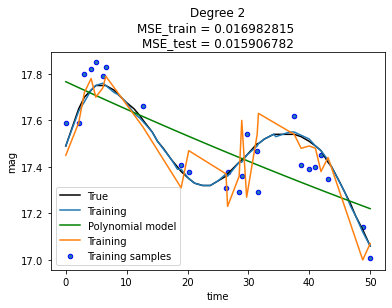

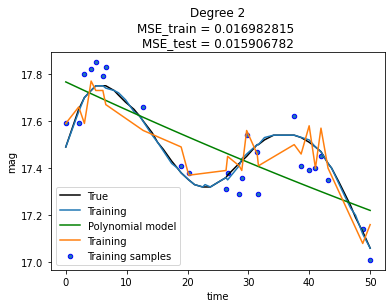

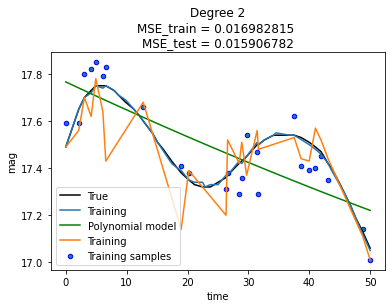

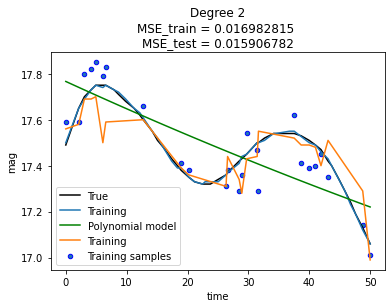

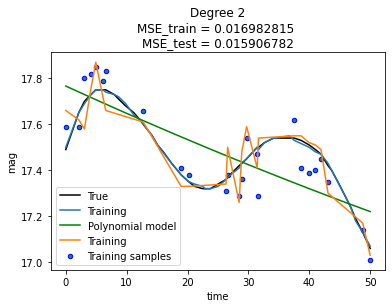

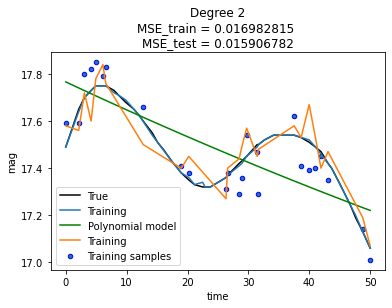

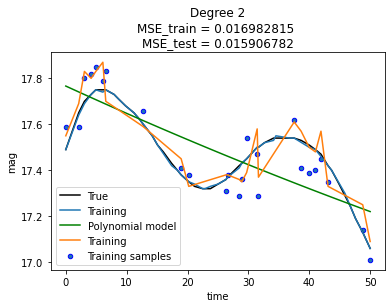

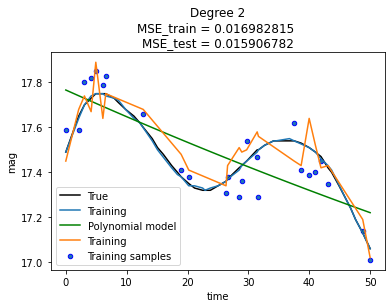

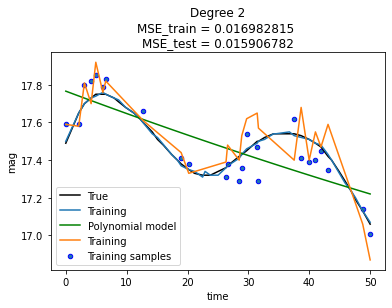

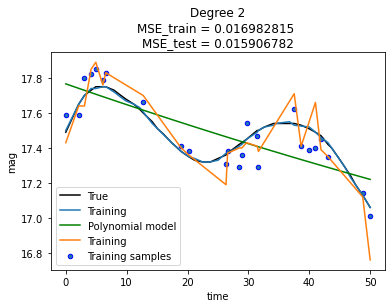

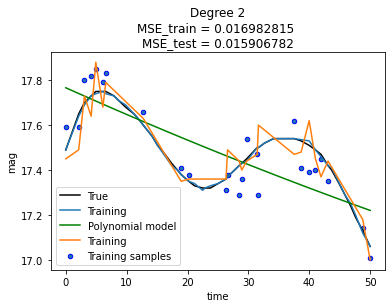

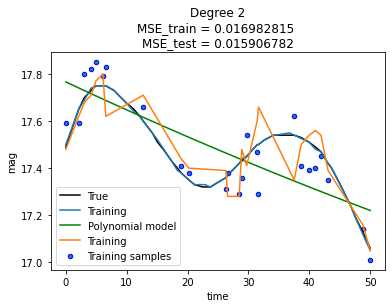

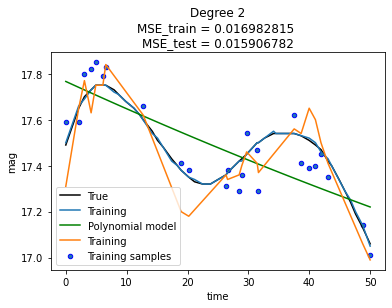

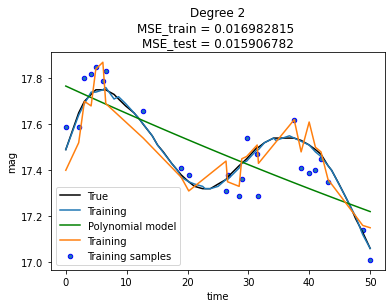

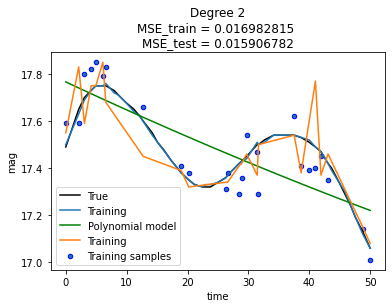

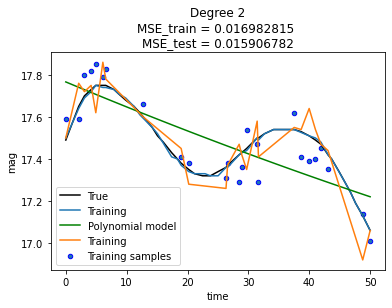

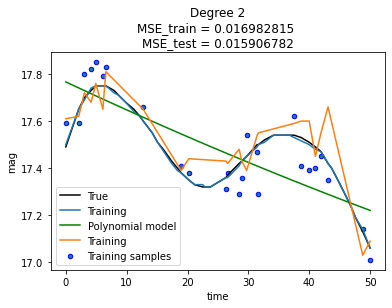

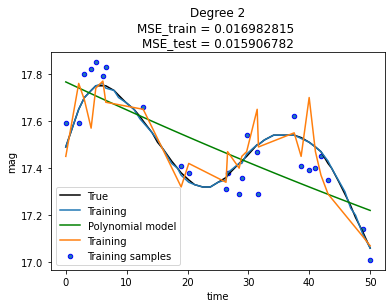

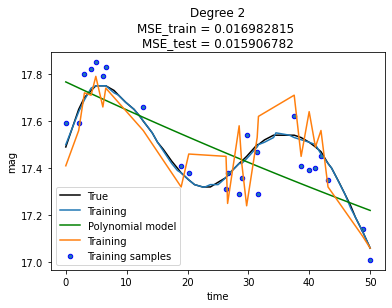

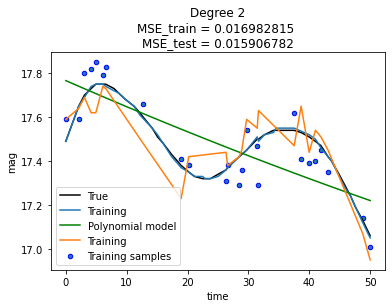

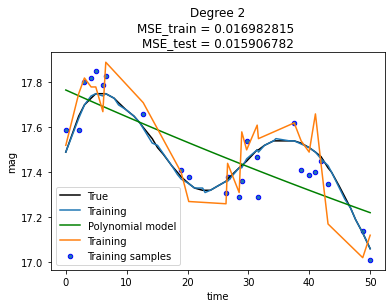

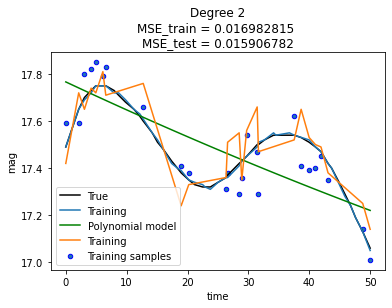

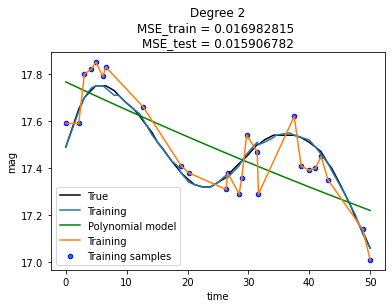

In [ ]:
#Plotting the data
import matplotlib.pyplot as plt
for i in range(1,101):
  plt.plot(x_test,y_test, color='k', label="True")
  plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
  plt.plot(d2[0], d2[i], label="Training")
  plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
  plt.plot(d3[0], d3[i], label="Training")
  plt.xlabel("time")
  plt.ylabel("mag")
  plt.legend(loc="best")
  plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
          degree, MSE_train, MSE_test))
  plt.show()

In [ ]:
#Calculating the bias and variance 
bias = np.mean(train + train2)
print("the bias (mean) for noisy data 1 is:", bias, "on train")
print("============================================================")
variance = np.var(train + train2)
print("the variance =", variance, "on train")
print("============================================================")
bias = np.mean(test + test2)
print("the bias (mean) for noisy data 1 is:", bias, "on test")
print("============================================================")
variance = np.var(test + test2)
print("the variance =", variance, "on test")

the bias (mean) for noisy data 1 is: 1.997250576870475 on train
the variance = 392.05091043635423 on train
the bias (mean) for noisy data 1 is: 1.9944293668510154 on test
the variance = 392.06206087135763 on test


# Conclusions 
This was an interesting and challenging work, I had to research how to calculate spline regression and how to plot it, I'm going to write a conclusion for each model, because it is important to explain how each one works and what I did.

- Linear Regression

For this regression I Uploaded the data and calculated the 100 realizations using 2 for the polynomial degree, I used this number because is the degree of a linear equation

- Polynomial Regression

In this one I use the same code as the linear regression, but the main difference is that I tried to find the best degree for the 100 realizations, the degree that had the best fitting was 9

**I calculate the MSE for the polynomial and linear regressions** 

- Spline Regression

This was the most interesting regression from the three, I had to look at the three different ways to calculate the spline regression and I thought that the best was to plot the three different ways to calculate it. I'm going to explain in more detail what I did.
- **a.x = a.Param(value= 1, lb=0, ub=100)**: What I'm defining here is that the function has to calculate the minimum value and the maximum value using the data from case 1 to case 100

-  **b.x = b.Param(value = np.linspace(-1,101))**: This function is calculating the spaces between the 100 data that I calculated before

- **d.x = d.Param(value = 1)**: In this last one the function is calculating the minimum value and the maximum value ignoring the other knots of the plot.

# References
https://www.youtube.com/watch?v=lZEI36_Bsv4&t=100s&ab_channel=APMonitor.com

http://apmonitor.com/wiki/index.php/Main/GekkoPythonOptimization 